## Observations and Insights 

There is a strong correlation between weight and tumor size (e.g The greater the mouse weight, the larger the tumor).
Over time, Capomulin dramatically reduced the tumor volume in Mouse m957.

In [274]:
# Dependencies and Setup
import matplotlib.pyplot as plt
#Using some tips from StackOverflow to suppress warnings
#https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table information
mouse_study_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [275]:
# Display the data table for preview
mouse_study_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [276]:
# Checking the number of mice.
mouse_count = mouse_study_complete["Mouse ID"].value_counts()
len(mouse_count)

249

In [277]:
#Finding the mouse that has duplicate timepoints 
dup_mouseid = mouse_study_complete[mouse_study_complete.duplicated(["Mouse ID", "Timepoint"])]
dup_mouseid = dup_mouseid_timepoints["Mouse ID"].unique()
dup_mouseid


array(['g989'], dtype=object)

In [278]:
# All the rows of data for the mouse that had duplicate time points
mouse_with_duplicates = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] == "g989"]
mouse_with_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [308]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID.
remove_mouse = mouse_study_complete[ mouse_study_complete["Mouse ID"] == "g989"].index
mouse_study_complete.drop(remove_mouse, inplace=True)
mouse_study_cleaned = mouse_study_complete.set_index("Drug Regimen")
#All rows of data removed for mouseID with duplicate timeponts
len(mouse_study_cleaned)

1880

In [309]:
# Checking the number of mice in the clean DataFrame.
mouse_count_check = mouse_study_cleaned["Mouse ID"].value_counts()
len(mouse_count_check)
#Mouse Removed

248

## Summary Statistics

### Method One

In [310]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [311]:
mouse_study_mean = mouse_study_cleaned.groupby("Drug Regimen").mean()

In [312]:
mouse_study_med = mouse_study_cleaned.groupby("Drug Regimen").median()

In [313]:
mouse_study_var = mouse_study_cleaned.groupby("Drug Regimen").var()

In [314]:
mouse_study_std = mouse_study_cleaned.groupby("Drug Regimen").std()

In [315]:
mouse_study_sem = mouse_study_cleaned.groupby("Drug Regimen").sem()

In [316]:
#Combining the summary tables and renaming the columns
first_merge = pd.merge(mouse_study_mean["Tumor Volume (mm3)"], mouse_study_med["Tumor Volume (mm3)"], on="Drug Regimen")
first_renamed = first_merge.rename(columns={"Tumor Volume (mm3)_x":"Tumor Volume Mean", "Tumor Volume (mm3)_y":"Tumor Volume Median"})
var_merge = pd.merge(first_renamed, mouse_study_var["Tumor Volume (mm3)"], on="Drug Regimen")
var_renamed = var_merge.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Varience"})
std_merge = pd.merge(var_renamed, mouse_study_std["Tumor Volume (mm3)"], on="Drug Regimen")
std_renamed = std_merge.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Standard Deviation"})
sem_merge = pd.merge(std_renamed, mouse_study_sem["Tumor Volume (mm3)"], on="Drug Regimen")
tumor_volume_summary = sem_merge.rename(columns={"Tumor Volume (mm3)":"Tumor Volume SEM"})
tumor_volume_summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Varience,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### Method Two

In [317]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_study_summary = mouse_study_cleaned.groupby("Drug Regimen")
#Using a single function rather than merging multiple tables
mouse_study_summary["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, st.sem])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [318]:
# Find the count of mice used for each drug regimen
mouse_study_count = mouse_study_cleaned.groupby(["Drug Regimen"])["Mouse ID"].nunique()
mouse_study_count

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

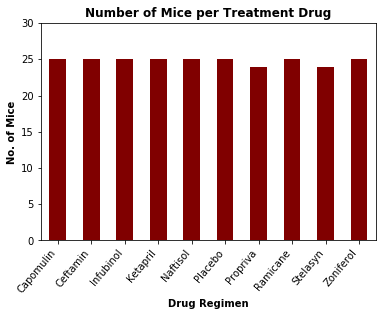

In [319]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_study_count.plot(kind="bar", color="maroon", width=.5)
plt.xlabel("Drug Regimen", fontweight="black") 
plt.ylabel("No. of Mice", fontweight="black") 
plt.title("Number of Mice per Treatment Drug", fontweight="black") 
#Rotation and horizontal alligment of the drug labels
plt.xticks(rotation=50, ha='right')
plt.yticks(np.arange(0, 35, 5))
plt.show()

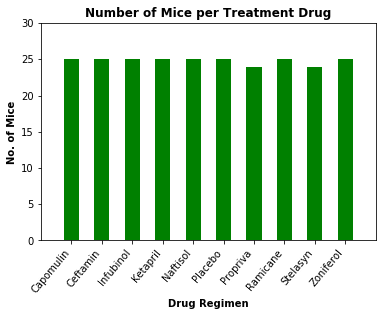

In [320]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
all_treatments = mouse_study_cleaned.groupby(["Drug Regimen"])["Mouse ID"].nunique()

# Create a dataframe from the grouped data and reset the index
treatments_and_mice = all_treatments.to_frame().reset_index()

#Plot and customize the bar chart
plt.bar(treatments_and_mice["Drug Regimen"], treatments_and_mice["Mouse ID"], align="center", color="green", width =.5)
plt.xlim(-1, len(all_treatments))
plt.ylim(0, max(treatments_and_mice["Mouse ID"])+5)
plt.xlabel("Drug Regimen", fontweight="black") 
plt.ylabel("No. of Mice", fontweight="black") 
plt.title("Number of Mice per Treatment Drug", fontweight="black") 
#Rotation and horizontal alligment of the drug labels
plt.xticks(rotation=50, ha='right')
plt.show()


In [321]:
gender_distribution

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

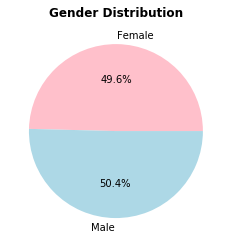

In [322]:
# Pie plot showing the distribution of female versus male mice using pandas
gender_distribution = mouse_study_cleaned.groupby(["Sex"])["Mouse ID"].nunique()
new_colors = ['pink','lightblue']
gender_distribution.plot(kind="pie", autopct='%1.1f%%', colors=new_colors)
plt.title("Gender Distribution", fontweight="black")
#Don't show the Mouse ID x axis label
plt.axis('off')
plt.show()

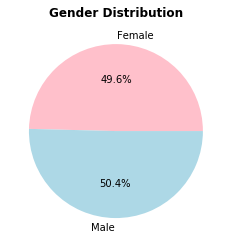

In [323]:
# Pie plot showing the distribution of female versus male mice using pyplot
genders = "Female","Male"
plt.pie(gender_distribution, labels=genders, autopct='%1.1f%%', colors=new_colors)
plt.title("Gender Distribution", fontweight="black") 
plt.show()

## Quartiles, Outliers and Boxplots

In [346]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  Capomulin, Ramicane, Infubinol, and Ceftamin
# Get the last (greatest) timepoint for each mouse
mouseid_groups = mouse_study_cleaned.groupby("Mouse ID")
final_treatments = mouseid_groups["Timepoint"].max()

In [347]:
#Creates a datafame with the drug regimen list and the last timepoint for each mouse
mouse_study_cleaned.reset_index()
mouse_study_final_treatments = pd.merge(final_treatments, mouse_study_cleaned, on=["Mouse ID", "Timepoint"])
#Tumor volume at each mouse's final timepoint
mouse_study_final_treatments[["Mouse ID", "Tumor Volume (mm3)", "Drug Regimen", "Timepoint"]]

,Mouse ID,Tumor Volume (mm3),Drug Regimen,Timepoint
0,a203,67.973419,Infubinol,45
1,a251,65.525743,Infubinol,45
2,a262,70.717621,Placebo,45
3,a275,62.999356,Ceftamin,45
4,a366,63.440686,Stelasyn,30
...,...,...,...,...
243,z435,48.710661,Propriva,10
244,z578,30.638696,Ramicane,45
245,z581,62.754451,Infubinol,45
246,z795,65.741070,Naftisol,45


### Capomulin Quartile Data

In [348]:
# Calculate the final tumor volume of each mouse for Capomulin
capomulin = mouse_study_final_treatments.loc[mouse_study_final_treatments["Drug Regimen"] == "Capomulin"]
capomulin_data = capomulin[["Mouse ID","Tumor Volume (mm3)", "Drug Regimen"]].set_index("Drug Regimen")
capomulin_TV = capomulin_data["Tumor Volume (mm3)"]

#Define the Capomulin quartiles
quartiles = capomulin_TV.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Check to see if there are outilers
print(f"Minimum Final Tumor Volume: {capomulin_TV.min()}")
print(f"Maximum Final Tumor Volume: {capomulin_TV.max()}")

capomulin_box = [ tumor_volume for tumor_volume in capomulin_TV ]

The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
The the median of Tumor Volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Minimum Final Tumor Volume: 23.34359787
Maximum Final Tumor Volume: 47.68596303


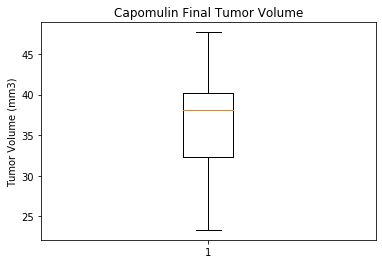

In [349]:
fig1, ax1 = plt.subplots()
ax1.set_title("Capomulin Final Tumor Volume")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(capomulin_box)
plt.show()

### Ramicane Quartile Data


In [350]:
# Calculate the final tumor volume of each mouse for Ramicane
ramicane = mouse_study_final_treatments.loc[mouse_study_final_treatments["Drug Regimen"] == "Ramicane"]
ramicane_data = ramicane[["Mouse ID","Tumor Volume (mm3)", "Drug Regimen"]].set_index("Drug Regimen")
ramicane_TV = ramicane_data["Tumor Volume (mm3)"]

#Define the Ramicane quartiles
quartiles = ramicane_TV.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Check to see if there are outilers
print(f"Minimum Final Tumor Volume: {ramicane_TV.min()}")
print(f"Maximum Final Tumor Volume: {ramicane_TV.max()}")

ramicane_box = [ tumor_volume for tumor_volume in ramicane_TV ]


The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
The the median of Tumor Volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Minimum Final Tumor Volume: 22.05012627
Maximum Final Tumor Volume: 45.22086888


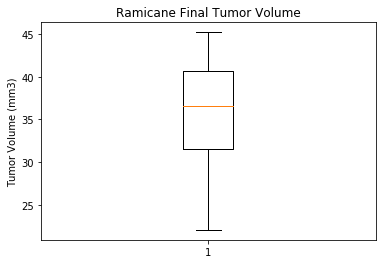

In [351]:
fig1, ax1 = plt.subplots()
ax1.set_title("Ramicane Final Tumor Volume")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(ramicane_box)
plt.show()

### Infubinol Quartile Data

In [352]:
# Calculate the final tumor volume of each mouse for Infubinol
infubinol = mouse_study_final_treatments.loc[mouse_study_final_treatments["Drug Regimen"] == "Infubinol"]
infubinol_data = infubinol[["Mouse ID","Tumor Volume (mm3)", "Drug Regimen"]].set_index("Drug Regimen")
infubinol_TV = infubinol_data["Tumor Volume (mm3)"]

#Define the Infubinol quartiles
quartiles = infubinol_TV.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Check to see if there are outilers
print(f"Minimum Final Tumor Volume: {infubinol_TV.min()}")
print(f"Maximum Final Tumor Volume: {infubinol_TV.max()}")

infubinol_box = [ tumor_volume for tumor_volume in infubinol_TV ]

The lower quartile of Tumor Volume is: 54.04860769
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is: 11.477135160000003
The the median of Tumor Volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Minimum Final Tumor Volume: 36.321345799999996
Maximum Final Tumor Volume: 72.2267309


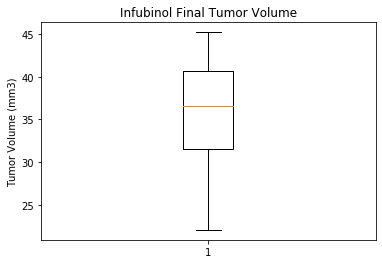

In [353]:
fig1, ax1 = plt.subplots()
ax1.set_title("Infubinol Final Tumor Volume")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(ramicane_box)
plt.show()

### Ceftamin Quartile Data

In [354]:
# Calculate the final tumor volume of each mouse for Ceftamin
ceftamin = mouse_study_final_treatments.loc[mouse_study_final_treatments["Drug Regimen"] == "Ceftamin"]
ceftamin_data = ceftamin[["Mouse ID","Tumor Volume (mm3)", "Drug Regimen"]].set_index("Drug Regimen")
ceftamin_TV = ceftamin_data["Tumor Volume (mm3)"]

#Define the Ceftamin quartiles
quartiles = ceftamin_TV.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Check to see if there are outilers
print(f"Minimum Final Tumor Volume: {capomulin_TV.min()}")
print(f"Maximum Final Tumor Volume: {capomulin_TV.max()}")

ceftamin_box = [ tumor_volume for tumor_volume in ceftamin_TV ]

The lower quartile of Tumor Volume is: 48.72207785
The upper quartile of Tumor Volume is: 64.29983003
The interquartile range of Tumor Volume is: 15.577752179999997
The the median of Tumor Volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Minimum Final Tumor Volume: 23.34359787
Maximum Final Tumor Volume: 47.68596303


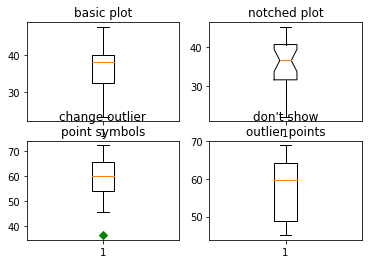

In [374]:
# Put treatments into a list using for 'for loop' (and later for plot labels)
drug_regimen = final_four_regimen["Drug Regimen"].unique()
treatment_list = [ treatment for treatment in drug_regimen ]

#Plotting the four drug regimens in one space
fig, axs = plt.subplots(2, 2)
#set_ylabel("Tumor Volume (mm3)")

# basic plot
axs[0, 0].boxplot(capomulin_box)
axs[0, 0].set_title('basic plot')

# notched plot
axs[0, 1].boxplot(ramicane_box, 1)
axs[0, 1].set_title('notched plot')

# change outlier point symbols
axs[1, 0].boxplot(infubinol_box, 0, 'gD')
axs[1, 0].set_title('change outlier\npoint symbols')

# don't show outlier points
axs[1, 1].boxplot(ceftamin_box, 0, '')
axs[1, 1].set_title("don't show\noutlier points")

plt.show()

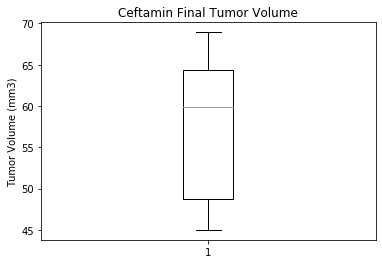

In [355]:

# fig1, ax1 = plt.subplots()
# ax1.set_title("Ceftamin Final Tumor Volume")
# ax1.set_ylabel("Tumor Volume (mm3)")
# ax1.boxplot(ceftamin_box)

#fig1, ax1 = plt.subplots()
plt.title("Ceftamin Final Tumor Volume")
plt.ylabel("Tumor Volume (mm3)")
plt.boxplot(ceftamin_box)

plt.show()

### Quartile Data Combining Capomulin, Ramicane, Infubinol, and Ceftamin 

In [356]:
#Combining the final tumor volume data for Capomulin, Ramicane, Infubinol, and Ceftamin in one table
cap_ram = capomulin_TV.append(ramicane_TV)
add_inf = cap_ram.append(infubinol_TV)
final_four = add_inf.append(ceftamin_TV)
final_four_regimen = final_four.reset_index()
final_four_regimen

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,38.982878
1,Capomulin,38.939633
2,Capomulin,30.485985
3,Capomulin,37.074024
4,Capomulin,40.159220
...,...,...
95,Ceftamin,45.000000
96,Ceftamin,64.634949
97,Ceftamin,61.386660
98,Ceftamin,68.594745


In [357]:
final_tumor_volumes = final_four_regimen["Tumor Volume (mm3)"]

# List of the final tumor volume data for Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_volume_data = [ tumor_volume for tumor_volume in final_tumor_volumes]
tumor_volume_data.sort()

#Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = final_tumor_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Check to see if there are outilers
print(f"Minimum Final Tumor Volume: {final_tumor_volumes.min()}")
print(f"Maximum Final Tumor Volume: {final_tumor_volumes.max()}")

The lower quartile of Tumor Volume is: 37.187743802499995
The upper quartile of Tumor Volume is: 59.930261755000004
The interquartile range of Tumor Volume is: 22.74251795250001
The the median of Tumor Volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.
Minimum Final Tumor Volume: 22.05012627
Maximum Final Tumor Volume: 72.2267309


## Final Four Boxplot

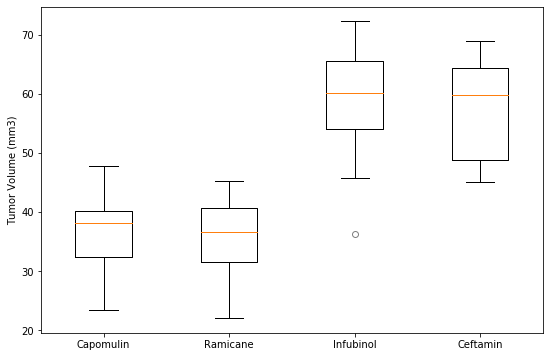

In [389]:
#Thanks to http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/ for helping get all the plots in one figure
# Get the tumor volume data list for the four chosen drug regimens
final_four = [capomulin_box, ramicane_box, infubinol_box, ceftamin_box]

# Put treatments into a list using for 'for loop' (and later for plot labels)
drug_regimen = final_four_regimen["Drug Regimen"].unique()
treatment_list = [ treatment for treatment in drug_regimen ]

#Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplots
group_plot = ax.boxplot(final_four)

#Add the axes labels
ax.set_xticklabels(treatment_list)
ax.set_ylabel("Tumor Volume (mm3)")

#Style the outliers
for flier in group_plot['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
plt.show()

## Line and Scatter Plots

In [359]:
# Timepoints and tumor volume data for a mouse using the Capomulin regimen
capomulin_timepoints = mouse_study_cleaned.loc[mouse_study_cleaned["Drug Regimen"] == "Capomulin"]
capomulin_m957_data = capomulin_timepoints.loc[capomulin_timepoints["Mouse ID"] == "m957"]
capomulin_m957_data

,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
135,Capomulin,m957,Female,3,19,0,45.000000,0
136,Capomulin,m957,Female,3,19,5,45.622381,1
137,Capomulin,m957,Female,3,19,10,46.414518,1
138,Capomulin,m957,Female,3,19,15,39.804453,1
139,Capomulin,m957,Female,3,19,20,38.909349,1
140,Capomulin,m957,Female,3,19,25,37.695432,1
141,Capomulin,m957,Female,3,19,30,38.212479,1
142,Capomulin,m957,Female,3,19,35,32.562839,1
143,Capomulin,m957,Female,3,19,40,32.947615,1
144,Capomulin,m957,Female,3,19,45,33.329098,1


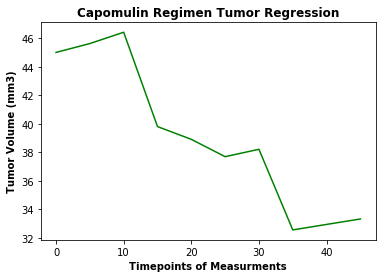

In [360]:
# Line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis = capomulin_m957_data["Timepoint"]
y_axis = capomulin_m957_data["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, color="green")
plt.xlabel("Timepoints of Measurments", fontweight="black") 
plt.ylabel("Tumor Volume (mm3)", fontweight="black") 
plt.title("Capomulin Regimen Tumor Regression", fontweight="black")
plt.show()

## Correlation and Regression

In [361]:
# Weight and average tumor volume data for the Capomulin regimen
capomulin_data = mouse_study_cleaned.loc[mouse_study_cleaned["Drug Regimen"] == "Capomulin"]
capomulin_data_avg = capomulin_data.groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean()

The correlation between both factors is 0.84


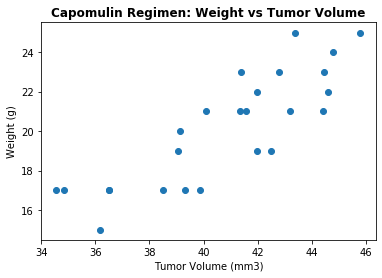

In [362]:
#Defining the x and y axis for the scatter plot
mouse_weight = capomulin_data_avg["Weight (g)"]
tumor_volume = capomulin_data_avg["Tumor Volume (mm3)"]

# Caclutating the correlation coefficient for mouse weight and average tumor volume
correlation = st.pearsonr(tumor_volume, mouse_weight)

# Capomulin regimen scatter plot of mouse weight versus average tumor volume
plt.scatter(tumor_volume, mouse_weight)
plt.xlabel("Tumor Volume (mm3)") 
plt.ylabel("Weight (g)") 
plt.title("Capomulin Regimen: Weight vs Tumor Volume", fontweight = "black")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The r-squared is: 0.7088568047708717


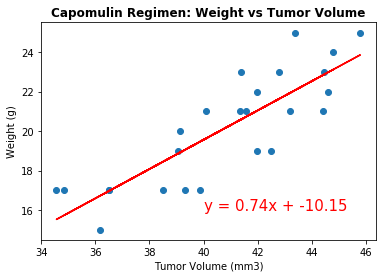

In [363]:
# Calculating the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(tumor_volume, mouse_weight)
regress_values = tumor_volume * slope + intercept

# Creating the linear regressing equation to add to the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Capomulin regimen scatter plot of mouse weight versus average tumor volume
plt.scatter(tumor_volume, mouse_weight)

# Adding the linear regression line
plt.plot(tumor_volume,regress_values,"r-")
plt.xlabel("Tumor Volume (mm3)") 
plt.ylabel("Weight (g)") 
plt.title("Capomulin Regimen: Weight vs Tumor Volume", fontweight = "black")

#Placing the linear regression equation on the plot
plt.annotate(line_eq,(40,16),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()